ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **23Mar23**

# 10. Shortest Least-Squares Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Shortest LSQ Solver](#usolver)
* [Anomalous Least-Squares Data Fitting](#fit)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-shortest-lsq-solver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EgTyfAiTr59Dk3yAb3eCZEcBeJZj2oWviJeXKpeRIB2YOg?e=aTnFnR) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\xvec \bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 + \epsilon\norm{\xvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [181]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -12.2
b =  88.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-8:] = 0.0
    if nrows < ncols:
        a_mtrx[-8:,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 8.151 60.674 -3.935 23.054 ... -5.22  -3.715 73.818 64.103]
 [44.213 39.337 10.825 47.101 ...  9.975 74.272 60.91  54.725]
 [27.051 51.369 45.172 41.084 ... 42.024 79.963 36.121 17.199]
 [-7.64  39.393 21.693 48.992 ... 62.37  25.443  8.898 56.21 ]
 ...
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    ...  0.     0.     0.     0.   ]]


In [182]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  12
Matrix is rank deficient.


In [183]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [ -1.836 -10.551 -18.846   1.939 -40.031 -32.315   0.064 -10.419 -39.039 -29.651 -31.088 -10.996
 -20.286 -37.891  -3.312 -30.527 -24.385 -38.064 -12.964 -15.116]


In [184]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,10)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivot_tol=1e-7, zero_tol=1e-10) # matrix is full rank; partial pivoting works
    #x_vec = np.linalg.solve(mtrx, vec)
    #print('')
    #print('x_vec=\n',x_vec)
    #print('')
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append( x_norm ) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 3.14799e-01
max(abs(x_vec-x_vec_numpy)) = 2.72e-14

||b - A x||^2 + eps*||x||^2 = 5.24019e+03
||b - A x|| +       ||x||   = 7.26355e+01
||b - A x||                 = 7.23207e+01

epsilon = 1.3e+01

||x|| = 3.16563e-01
max(abs(x_vec-x_vec_numpy)) = 2.21e-13

||b - A x||^2 + eps*||x||^2 = 5.23151e+03
||b - A x|| +       ||x||   = 7.26368e+01
||b - A x||                 = 7.23202e+01

epsilon = 1.7e+00

||x|| = 3.16795e-01
max(abs(x_vec-x_vec_numpy)) = 1.26e-12

||b - A x||^2 + eps*||x||^2 = 5.23038e+03
||b - A x|| +       ||x||   = 7.26370e+01
||b - A x||                 = 7.23202e+01

epsilon = 2.2e-01

||x|| = 3.16825e-01
max(abs(x_vec-x_vec_numpy)) = 1.81e-11

||b - A x||^2 + eps*||x||^2 = 5.23024e+03
||b - A x|| +       ||x||   = 7.26370e+01
||b - A x||                 = 7.23202e+01

epsilon = 2.8e-02

||x|| = 3.16829e-01
max(abs(x_vec-x_vec_numpy)) = 1.38e-10

||b - A x||^2 + eps*||x||^2 = 5.23022e+03
||b - A x|| +       ||x||   = 7.26370e+01
||b - A x|| 

**NB:** Note that the associated rank-deficient LS problem, has an infinite number of minima. The $\xvec$ used next is the shortest LS solution.

In [185]:
print('||AT(b - A x)|| = %8.5e'%(np.linalg.norm(a_mtrx.transpose()@residual_vec)))

||AT(b - A x)|| = 3.16831e-07


**NB:** For example take the vector computed by setting all independent values of the linear system to zero. Note $\norm{\yvec}-\norm{\xvec} \ge 0$.

In [186]:
y0_vec = np.zeros(a_mtrx.shape[1])
y_vec = solve(a_mtrx, b_vec, y0_vec)
print('||AT(b - A y)|| = %8.5e'%(np.linalg.norm(a_mtrx.transpose()@(b_vec-a_mtrx@y_vec))))
print('||y_vec|| = %8.5e'%(np.linalg.norm(y_vec)))
print('||y_vec|| - ||x_vec|| = %8.5e'%(np.linalg.norm(y_vec)-np.linalg.norm(x_vec)))

||AT(b - A y)|| = 2.62172e-12
||y_vec|| = 4.21920e-01
||y_vec|| - ||x_vec|| = 1.05091e-01


**NB:** This can be repeated for any vector with arbitrary values assigned to the independent variables.

In [258]:
a = 2*x_vec.min()
b = 2*x_vec.max()

for i in range(10):
    y0_vec = (b-a)*np.random.random(ncols) + a
    y_vec = solve(a_mtrx, b_vec, y0_vec)
    print('||AT(b - A y)|| = %8.5e'%(np.linalg.norm(a_mtrx.transpose()@(b_vec-a_mtrx@y_vec))))
    print('||y_vec|| = %8.5e'%(np.linalg.norm(y_vec)))
    print('||y_vec|| - ||x_vec|| = %8.5e'%(np.linalg.norm(y_vec)-np.linalg.norm(x_vec)))
    print('')

||AT(b - A y)|| = 1.88052e-11
||y_vec|| = 1.39286e+00
||y_vec|| - ||x_vec|| = 1.07603e+00

||AT(b - A y)|| = 1.39647e-11
||y_vec|| = 1.21676e+00
||y_vec|| - ||x_vec|| = 8.99932e-01

||AT(b - A y)|| = 1.10877e-11
||y_vec|| = 1.54884e+00
||y_vec|| - ||x_vec|| = 1.23201e+00

||AT(b - A y)|| = 1.87271e-11
||y_vec|| = 9.23930e-01
||y_vec|| - ||x_vec|| = 6.07101e-01

||AT(b - A y)|| = 1.18530e-11
||y_vec|| = 1.11556e+00
||y_vec|| - ||x_vec|| = 7.98735e-01

||AT(b - A y)|| = 7.19815e-12
||y_vec|| = 1.30253e+00
||y_vec|| - ||x_vec|| = 9.85696e-01

||AT(b - A y)|| = 2.44320e-11
||y_vec|| = 1.54364e+00
||y_vec|| - ||x_vec|| = 1.22681e+00

||AT(b - A y)|| = 2.02213e-11
||y_vec|| = 1.20964e+00
||y_vec|| - ||x_vec|| = 8.92814e-01

||AT(b - A y)|| = 1.40972e-11
||y_vec|| = 1.14278e+00
||y_vec|| - ||x_vec|| = 8.25952e-01

||AT(b - A y)|| = 3.16804e-11
||y_vec|| = 1.65696e+00
||y_vec|| - ||x_vec|| = 1.34013e+00



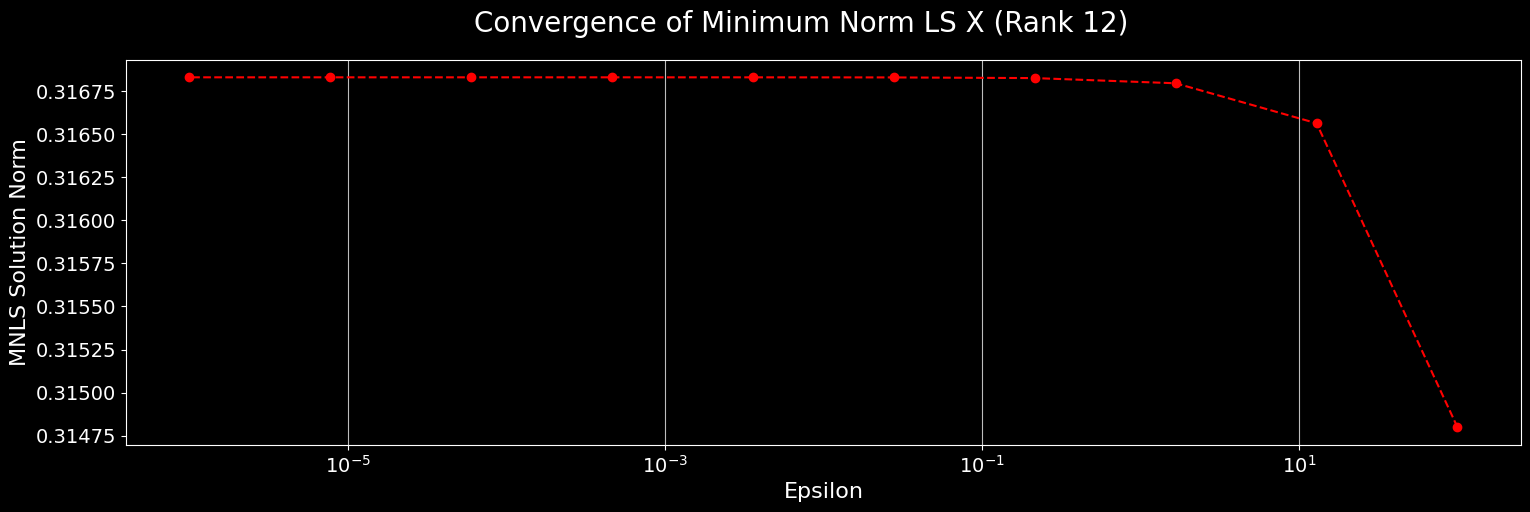

In [189]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('MNLS Solution Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS X (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

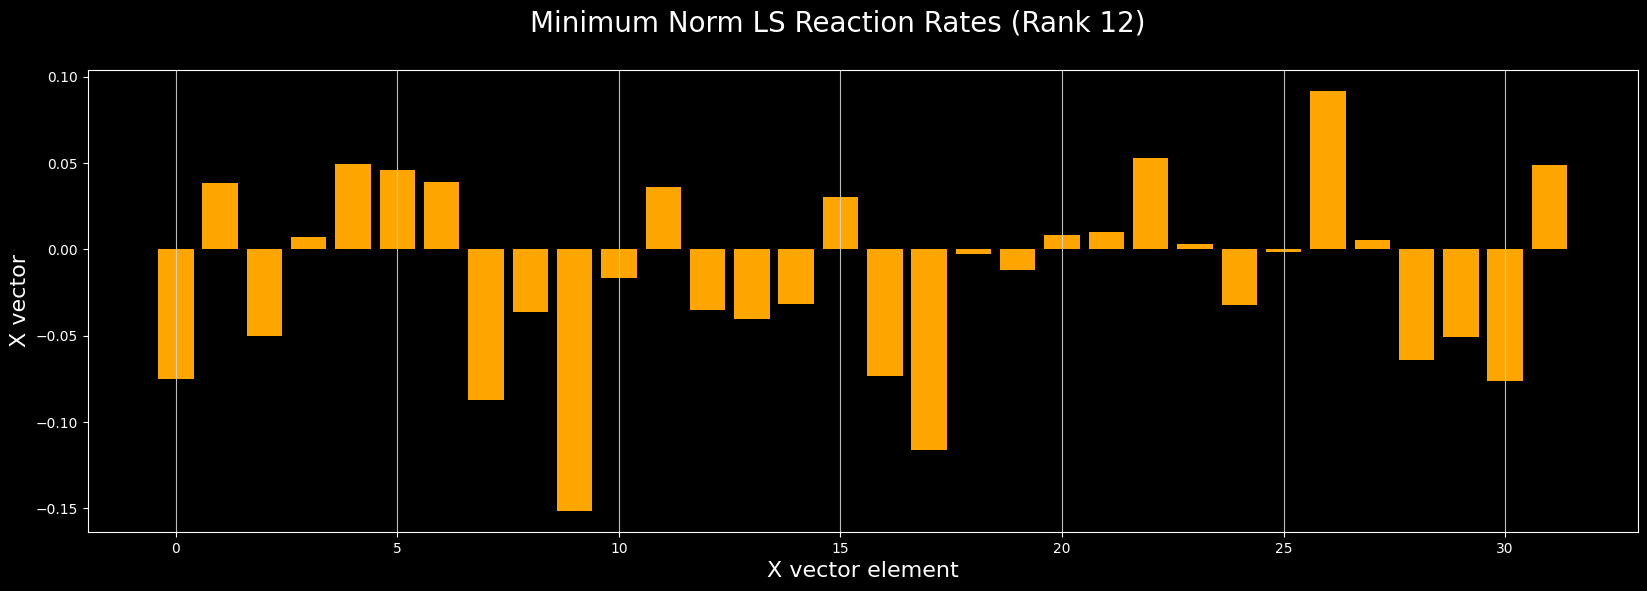

In [190]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Shortest LSQ Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [54]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 773.565  300.957  -70.455  342.512 ...  123.533  322.804 -113.032  779.918]
 [ 654.624  118.192  562.858  425.285 ...   66.977   35.234  302.99    14.276]
 [ -19.364  738.01    68.212  641.78  ...  626.831  -23.416  -84.107  141.154]
 [ 394.016  447.609  499.333  787.955 ...  299.249 -115.345 -100.798  262.074]
 ...
 [  55.718  118.114  501.05   117.557 ...  435.993  680.132  229.2    199.474]
 [ 571.05   746.001  421.097  133.064 ...  518.284  452.874  581.757  560.053]
 [ 464.286  498.441  583.039  147.048 ...  441.527  338.425  153.743  105.262]
 [   0.       0.       0.       0.    ...    0.       0.       0.       0.   ]]


In [55]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [56]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-22.864 -37.504 -30.502 -34.62  -28.2    -9.693 -17.52   -5.257   3.565  -3.067 -23.595 -31.096
  -9.374 -20.347  -8.415 -30.891  -9.119  -3.416 -14.528 -21.261]


In [57]:
import numpy as np

try:    
    from chen_3170.toolkit import shortest_least_squares_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

x_vec = shortest_least_squares_solve(a_mtrx, b_vec, epsilon_min=-6, pivot_tol=1e-6)

print('Magnitude of residual vector: ||b - Ax|| = %3.3e'%np.linalg.norm(b_vec-a_mtrx@x_vec))
print('Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = %3.3e'%np.linalg.norm(a_mtrx.transpose()@(b_vec-a_mtrx@x_vec)))

Magnitude of residual vector: ||b - Ax|| = 2.126e+01
Magnitude of residual vector of the normal equations: ||AT(b - Ax)|| = 5.602e-08


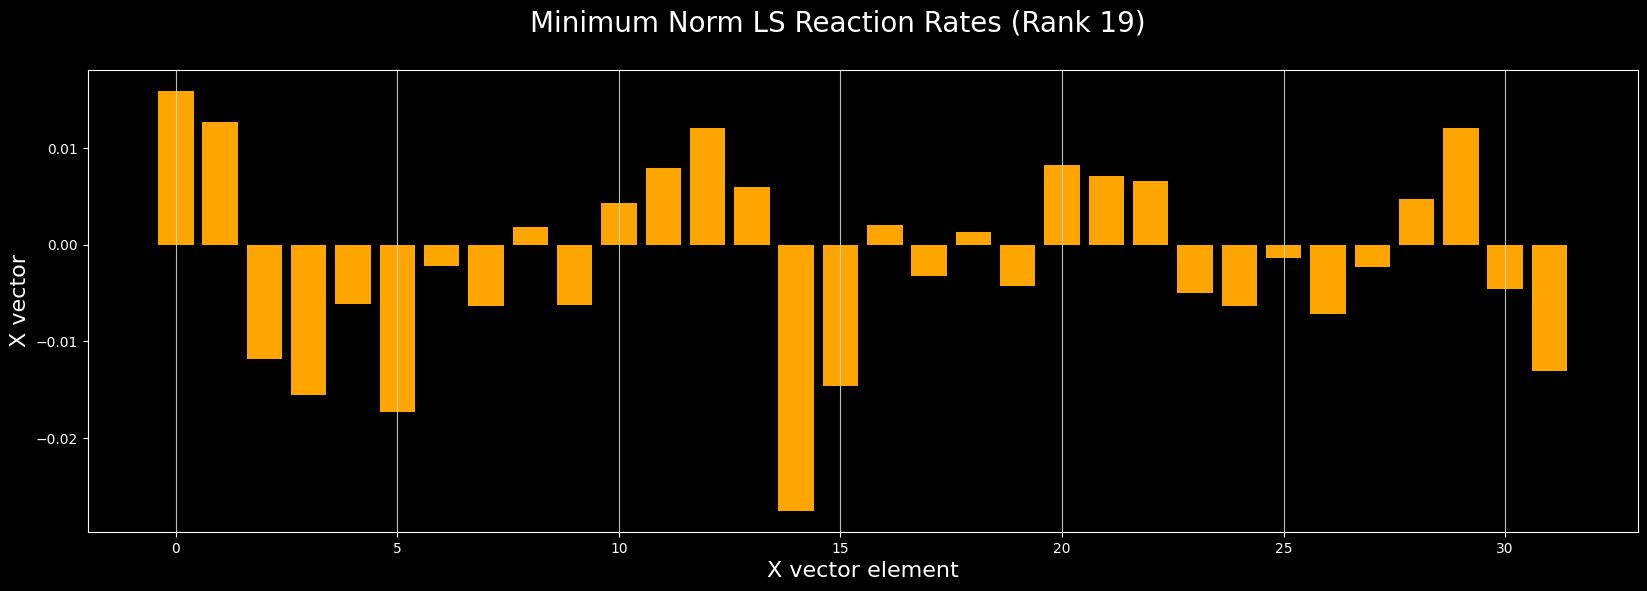

In [58]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Anomalous Linear Least-Squares Data Fitting](#toc)<a id="fit"></a>

Example of data fitting where the universal solver is the only way to find a satisfactory fit.

In [ ]:
import numpy as np

m_pts = 7

x_values = 1*np.ones(m_pts)
y_values = 1.12 * abs(np.random.random(m_pts))

a_mtrx = np.zeros((m_pts, 2))
a_mtrx[:,0] = np.ones(m_pts)
a_mtrx[:,1] = -x_values


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

plt.plot(x_values, y_values, 'r*', label='experimental')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.ylabel(r'$y$ []',fontsize=14)
plt.xlim(min(x_values)-.1, max(x_values)+.1)
plt.title('Some Arbitrary Data',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

rank = matrix_rank(a_mtrx)

if rank == min(np.shape(a_mtrx)):
    print('Full-rank matrix')
else:
    print('Rank-deficient matrix')
print('matrix rank = ', rank)

In [ ]:
try:    
    from chen_3170.toolkit import universal_solve   
    from chen_3170.toolkit import solve  
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'
    
x_vec = universal_solve(a_mtrx, y_values, epsilon_min=-6, pivot_tol=1e-9)

#this will not work: x_vec = solve(a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@y_values, pivot_tol=1e-7)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
    
plt.figure(1, figsize=(7, 7))

n_plot_pts = 15
x_plot = np.linspace(min(x_values)-.01, max(x_values)+.01, n_plot_pts)
a_mtrx_x = np.ones((n_plot_pts, 2))
a_mtrx_x[:,1]= -x_plot

plt.plot(x_values, y_values,'r*',label='experimental')
plt.plot(x_plot, a_mtrx_x@x_vec,'y*',label='MNLS')
    
plt.xlabel(r'$x$ []',fontsize=14)
plt.xlim(min(x_values)-.01, max(x_values)+.01)
plt.ylabel(r'$y$ []',fontsize=14)
plt.title('Linear Least-Squared Approximation',fontsize=20)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
y_values

In [ ]:
y_values.mean()

In [ ]:
a_mtrx_x@x_vec

In [ ]:
(a_mtrx_x@x_vec).mean()